
Лабораторна робота_10_1_(Intro_to_Keras)

Завантаження та підготовка даних

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

data = pd.read_csv('onlinefoods.csv')

# Перевірка перших декількох рядків
print(data.head())

# Інформація про структуру даних
print(data.info())

# Кодування категоріальних змінних
for column in ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Видалення зайвих стовпців
data = data.drop(columns=['Unnamed: 12', 'Output'])  # Припускаю, що 'Unnamed: 12' не несе корисної інформації

# Визначення вхідних та вихідних змінних
X = data.drop('Age', axis=1)
y = data['Age']

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

Побудова моделі Keras для лінійної регресії

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Лінійна регресійна модель
model_linear = Sequential()
model_linear.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model_linear.compile(optimizer='adam', loss='mean_squared_error')
model_linear.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Оцінка моделі
loss_linear = model_linear.evaluate(X_test, y_test)
print(f'Linear Regression Loss: {loss_linear}')


Epoch 1/50
31/31 [==============================] - 1s 3ms/step - loss: 619.2742
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 617.6505
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 616.0416
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 614.4542
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 612.8826
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 611.3064
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 609.7144
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 608.1600
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 606.5971
Epoch 10/50
31/31 [==============================] - 0s 2ms/step - loss: 605.0369
Epoch 11/50
31/31 [==============================] - 0s 2ms/step - loss: 603.4532
Epoch 12/50
31/31 [==============================] - 0s 1ms/step - loss: 601.8918
Epoch 13/50
31/31 [======

Побудова моделі Keras для поліноміальної регресії

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Поліноміальні ознаки
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Поліноміальна регресійна модель
model_poly = Sequential()
model_poly.add(Dense(1, input_dim=X_poly_train.shape[1], activation='linear'))

model_poly.compile(optimizer='adam', loss='mean_squared_error')
model_poly.fit(X_poly_train, y_train, epochs=100, batch_size=10, verbose=1)

# Оцінка моделі
loss_poly = model_poly.evaluate(X_poly_test, y_test)
print(f'Polynomial Regression Loss: {loss_poly}')


Epoch 1/50
31/31 [==============================] - 1s 3ms/step - loss: 634.1231
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 611.9371
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 590.7604
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 569.8637
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 549.9565
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 530.6214
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 511.6715
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 493.5403
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 475.9483
Epoch 10/50
31/31 [==============================] - 0s 3ms/step - loss: 458.9885
Epoch 11/50
31/31 [==============================] - 0s 3ms/step - loss: 442.4147
Epoch 12/50
31/31 [==============================] - 0s 2ms/step - loss: 426.6050
Epoch 13/50
31/31 [======

Графіки

3/3 [==============================] - 0s 6ms/step


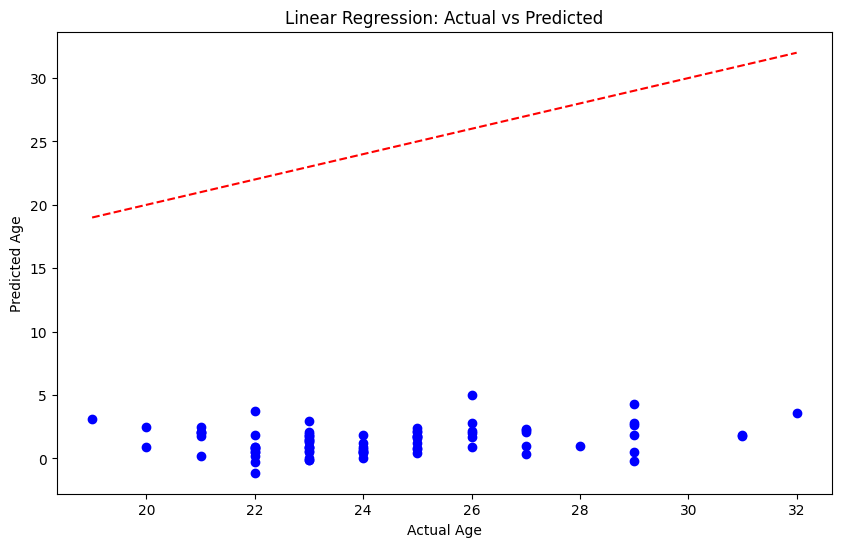

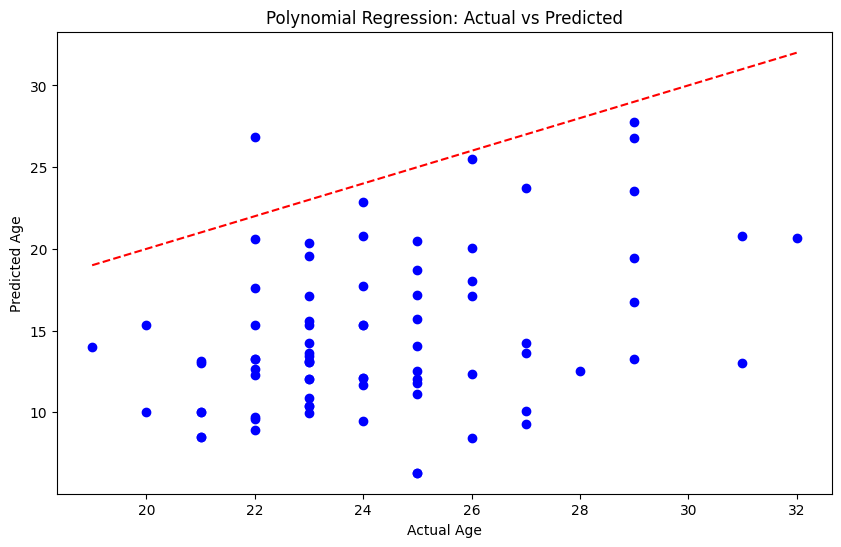

In [ ]:
import matplotlib.pyplot as plt

# Передбачення
y_pred_linear = model_linear.predict(X_test).flatten()
y_pred_poly = model_poly.predict(X_poly_test).flatten()

# Графік для лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Графік для поліноміальної регресії
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()



Порівняти отримані результати

In [ ]:
print(f'Linear Regression MSE: {loss_linear}')
print(f'Polynomial Regression MSE: {loss_poly}')


Linear Regression MSE: 530.6305541992188
Polynomial Regression MSE: 113.17353057861328


 Отримані значення середньоквадратичної помилки (MSE) показують, що поліноміальна регресійна модель має значно менше MSE (113.17) в порівнянні з лінійною регресійною моделлю (530.63). Це означає, що поліноміальна модель краще відтворює залежність між вхідними та вихідними змінними у вашому наборі даних.

Таке різниця у значеннях MSE показує, що використання поліноміальних ознак дозволяє моделі краще підлаштуватися під дані, що може призвести до кращої точності передбачень віку. Таким чином, з погляду MSE поліноміальна регресійна модель є кращим вибором для цього набору даних.

Лабораторна робота_10_2_(Логістична_регресія_з_Keras)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)


60000 train samples
10000 test samples
image shape (28, 28)


In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


In [ ]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]


label:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Завантажимо дані MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Масштабуємо дані та перетворимо мітки в категоріальні
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Model

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9814 - accuracy: 0.7758 - val_loss: 0.6046 - val_accuracy: 0.8611
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.5533 - accuracy: 0.8656 - val_loss: 0.4791 - val_accuracy: 0.8819
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4735 - accuracy: 0.8779 - val_loss: 0.4292 - val_accuracy: 0.8891
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4348 - accuracy: 0.8848 - val_loss: 0.4002 - val_accuracy: 0.8949
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4105 - accuracy: 0.8901 - val_loss: 0.3809 - val_accuracy: 0.9003
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3936 - accuracy: 0.8932 - val_loss: 0.3674 - val_accuracy: 0.9020
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3809 - accuracy: 0.8960 - val_loss: 0.3570 - val_accuracy: 0.9050
Epoch 

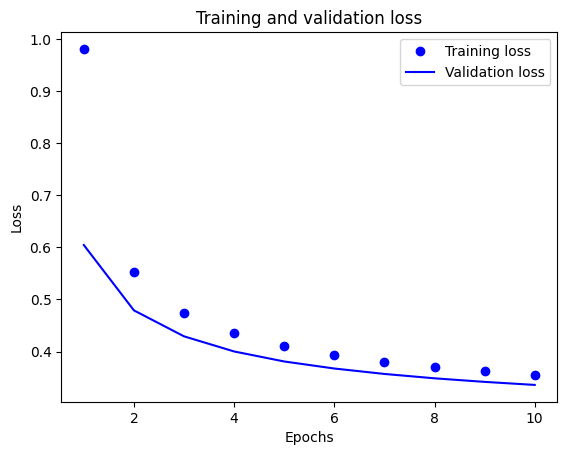

Test score: 0.3358847200870514
Test accuracy: 0.9086999893188477


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,epochs=10,batch_size=64, validation_data=(x_test, y_test),verbose=1)

print(model.summary())

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Змінюємо функцію активації та оптимізатор

In [ ]:
model_relu_adam = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_relu_adam.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

history_relu_adam = model_relu_adam.fit(x_train,
                                        y_train,
                                        epochs=10,
                                        batch_size=64,
                                        validation_split=0.2,
                                        verbose=2)

score_relu_adam = model_relu_adam.evaluate(x_test, y_test, verbose=0)
print('Test score (ReLU, Adam):', score_relu_adam[0])
print('Test accuracy (ReLU, Adam):', score_relu_adam[1])


Epoch 1/10
750/750 - 8s - loss: 0.3342 - accuracy: 0.9060 - val_loss: 0.1819 - val_accuracy: 0.9482 - 8s/epoch - 11ms/step
Epoch 2/10
750/750 - 3s - loss: 0.1507 - accuracy: 0.9560 - val_loss: 0.1364 - val_accuracy: 0.9588 - 3s/epoch - 4ms/step
Epoch 3/10
750/750 - 3s - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.1190 - val_accuracy: 0.9661 - 3s/epoch - 4ms/step
Epoch 4/10
750/750 - 3s - loss: 0.0835 - accuracy: 0.9764 - val_loss: 0.1038 - val_accuracy: 0.9691 - 3s/epoch - 4ms/step
Epoch 5/10
750/750 - 4s - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.1025 - val_accuracy: 0.9677 - 4s/epoch - 5ms/step
Epoch 6/10
750/750 - 3s - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0904 - val_accuracy: 0.9732 - 3s/epoch - 4ms/step
Epoch 7/10
750/750 - 3s - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.0931 - val_accuracy: 0.9722 - 3s/epoch - 4ms/step
Epoch 8/10
750/750 - 4s - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.0887 - val_accuracy: 0.9724 - 4s/epoch - 5ms/step
Epoch 9/10
750/750 - 3s

In [ ]:
model_tanh_rmsprop = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(num_classes, activation='softmax')
])

model_tanh_rmsprop.compile(optimizer='rmsprop',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history_tanh_rmsprop = model_tanh_rmsprop.fit(x_train,
                                               y_train,
                                               epochs=10,
                                               batch_size=64,
                                               validation_split=0.2,
                                               verbose=2)

score_tanh_rmsprop = model_tanh_rmsprop.evaluate(x_test, y_test, verbose=0)
print('Test score (tanh, RMSprop):', score_tanh_rmsprop[0])
print('Test accuracy (tanh, RMSprop):', score_tanh_rmsprop[1])


Epoch 1/10
750/750 - 6s - loss: 0.3409 - accuracy: 0.9019 - val_loss: 0.2134 - val_accuracy: 0.9411 - 6s/epoch - 8ms/step
Epoch 2/10
750/750 - 10s - loss: 0.1838 - accuracy: 0.9459 - val_loss: 0.1600 - val_accuracy: 0.9549 - 10s/epoch - 14ms/step
Epoch 3/10
750/750 - 4s - loss: 0.1337 - accuracy: 0.9611 - val_loss: 0.1333 - val_accuracy: 0.9626 - 4s/epoch - 5ms/step
Epoch 4/10
750/750 - 3s - loss: 0.1030 - accuracy: 0.9705 - val_loss: 0.1241 - val_accuracy: 0.9638 - 3s/epoch - 5ms/step
Epoch 5/10
750/750 - 4s - loss: 0.0842 - accuracy: 0.9759 - val_loss: 0.1105 - val_accuracy: 0.9670 - 4s/epoch - 5ms/step
Epoch 6/10
750/750 - 3s - loss: 0.0696 - accuracy: 0.9805 - val_loss: 0.0988 - val_accuracy: 0.9725 - 3s/epoch - 4ms/step
Epoch 7/10
750/750 - 3s - loss: 0.0580 - accuracy: 0.9834 - val_loss: 0.0970 - val_accuracy: 0.9729 - 3s/epoch - 4ms/step
Epoch 8/10
750/750 - 4s - loss: 0.0493 - accuracy: 0.9861 - val_loss: 0.0948 - val_accuracy: 0.9732 - 4s/epoch - 5ms/step
Epoch 9/10
750/750 - 

In [ ]:
model_sigmoid_rmsprop = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])

model_sigmoid_rmsprop.compile(optimizer='rmsprop',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

history_sigmoid_rmsprop = model_sigmoid_rmsprop.fit(x_train,
                                                    y_train,
                                                    epochs=10,
                                                    batch_size=64,
                                                    validation_split=0.2,
                                                    verbose=2)

score_sigmoid_rmsprop = model_sigmoid_rmsprop.evaluate(x_test, y_test, verbose=0)
print('Test score (Sigmoid + RMSprop):', score_sigmoid_rmsprop[0])
print('Test accuracy (Sigmoid + RMSprop):', score_sigmoid_rmsprop[1])


Epoch 1/10
750/750 - 6s - loss: 0.5026 - accuracy: 0.8714 - val_loss: 0.2683 - val_accuracy: 0.9240 - 6s/epoch - 8ms/step
Epoch 2/10
750/750 - 3s - loss: 0.2511 - accuracy: 0.9268 - val_loss: 0.2117 - val_accuracy: 0.9400 - 3s/epoch - 5ms/step
Epoch 3/10
750/750 - 4s - loss: 0.1992 - accuracy: 0.9414 - val_loss: 0.1851 - val_accuracy: 0.9469 - 4s/epoch - 5ms/step
Epoch 4/10
750/750 - 4s - loss: 0.1656 - accuracy: 0.9520 - val_loss: 0.1568 - val_accuracy: 0.9560 - 4s/epoch - 5ms/step
Epoch 5/10
750/750 - 5s - loss: 0.1417 - accuracy: 0.9584 - val_loss: 0.1434 - val_accuracy: 0.9589 - 5s/epoch - 7ms/step
Epoch 6/10
750/750 - 6s - loss: 0.1228 - accuracy: 0.9642 - val_loss: 0.1324 - val_accuracy: 0.9632 - 6s/epoch - 8ms/step
Epoch 7/10
750/750 - 4s - loss: 0.1083 - accuracy: 0.9690 - val_loss: 0.1222 - val_accuracy: 0.9663 - 4s/epoch - 5ms/step
Epoch 8/10
750/750 - 3s - loss: 0.0955 - accuracy: 0.9726 - val_loss: 0.1146 - val_accuracy: 0.9670 - 3s/epoch - 5ms/step
Epoch 9/10
750/750 - 4s 

Лабораторна_робота_10_3_(Keras_MLP_MNIST)

Запропонована архітектура

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 512)               401920    
                                                                 
 dense_59 (Dense)            (None, 512)               262656    
                                                                 
 dense_60 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 - 14s - loss: 0.2139 - accuracy: 0.9362 - val_loss: 0.1236 - val_accuracy: 0.9619 - 14s/epoch - 18ms/step
Epoch 2/10
750/750 - 10s - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.1033 - val_accuracy: 0.9697 - 10s/epoch - 14ms/step
Epoch 3/10
750/750 - 10s - loss

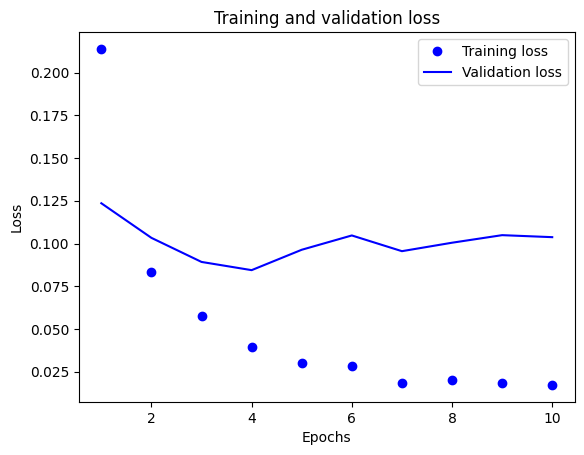

Test score: 0.09555531293153763
Test accuracy: 0.9781000018119812


In [ ]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model =  keras.Sequential()

model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_69 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                    

Змінюємо архітектуру

60000 train samples
10000 test samples
image shape (28, 28)
label:  5


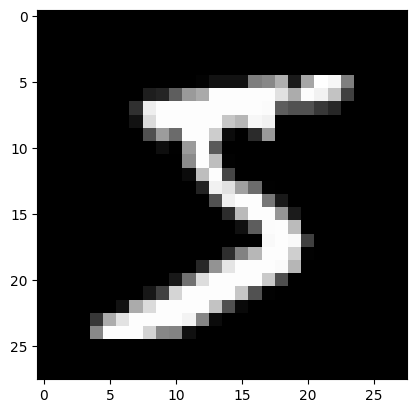

input shape:  784
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 512)               401920    
                                                                 
 dense_62 (Dense)            (None, 256)               131328    
                                                                 
 dense_63 (Dense)            (None, 128)               32896     
                                                                 
 dense_64 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 - 10s - loss: 0.2274 - accuracy: 0.9317 - val_loss: 0.1284 - val_accuracy: 0.9611 - 10s/epoch - 13ms/step
Epoch 

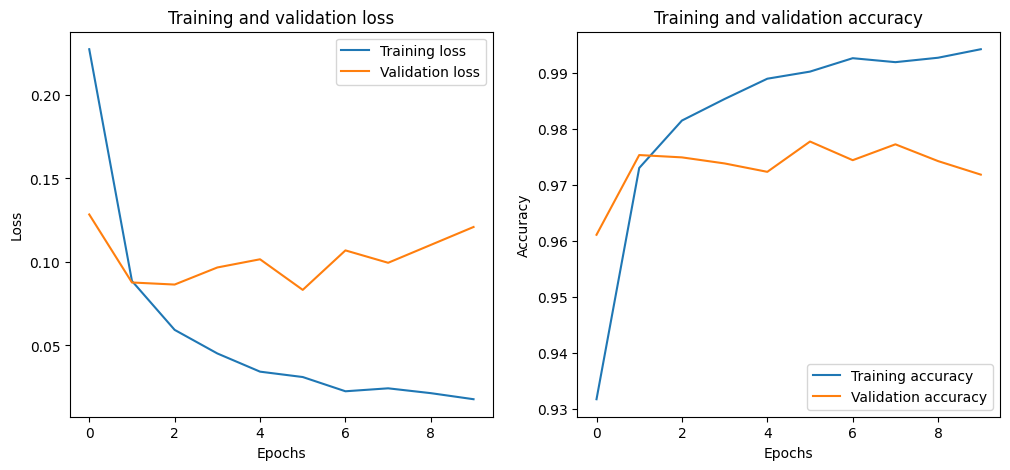

Training accuracy: 0.9942499995231628
Validation accuracy: 0.971833348274231
Training loss: 0.017761584371328354
Validation loss: 0.12090577185153961


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Завантаження даних
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Перевірка розмірів даних
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

# Візуалізація прикладу
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]
plt.imshow(image, cmap='gray')
plt.show()

# Переведення зображень у вектори
input_dim = 28 * 28 #784
x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

# Нормалізація даних
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Конвертація класів у бінарні матриці
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Модель з модифікованою архітектурою
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# Компіляція моделі
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

# Порівняння результатів
plt.figure(figsize=(12, 5))

# Візуалізація графіків втрат на навчальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Візуалізація графіків точності на навчальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




# Виведення результатів точності та втрат
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

In [ ]:
# Модель зі зміненими параметрами Dropout
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
# Компіляція моделі
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_72 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_73 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/75

Лабораторна робота_10_4_(Keras_IMDB)

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt


In [72]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 0s 0us/step


In [73]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [78]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Model

In [79]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [80]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [81]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
40/40 - 4s - loss: 0.4712 - accuracy: 0.8041 - val_loss: 0.3504 - val_accuracy: 0.8812 - 4s/epoch - 101ms/step
Epoch 2/10
40/40 - 3s - loss: 0.2963 - accuracy: 0.8976 - val_loss: 0.3002 - val_accuracy: 0.8858 - 3s/epoch - 72ms/step
Epoch 3/10
40/40 - 2s - loss: 0.2385 - accuracy: 0.9162 - val_loss: 0.2747 - val_accuracy: 0.8930 - 2s/epoch - 60ms/step
Epoch 4/10
40/40 - 2s - loss: 0.2041 - accuracy: 0.9297 - val_loss: 0.3057 - val_accuracy: 0.8768 - 2s/epoch - 60ms/step
Epoch 5/10
40/40 - 1s - loss: 0.1836 - accuracy: 0.9356 - val_loss: 0.3351 - val_accuracy: 0.8660 - 1s/epoch - 37ms/step
Epoch 6/10
40/40 - 1s - loss: 0.1655 - accuracy: 0.9447 - val_loss: 0.2916 - val_accuracy: 0.8856 - 1s/epoch - 36ms/step
Epoch 7/10
40/40 - 1s - loss: 0.1521 - accuracy: 0.9484 - val_loss: 0.2797 - val_accuracy: 0.8898 - 1s/epoch - 35ms/step
Epoch 8/10
40/40 - 1s - loss: 0.1392 - accuracy: 0.9522 - val_loss: 0.2991 - val_accuracy: 0.8856 - 1s/epoch - 36ms/step
Epoch 9/10
40/40 - 2s - loss: 0

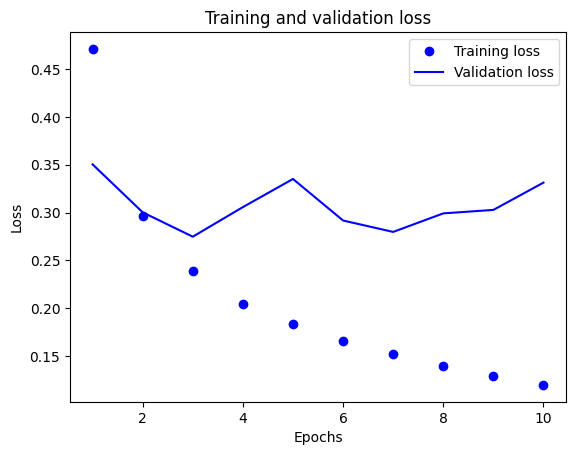

In [84]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [85]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.34439051151275635
Test accuracy: 0.8703200221061707


Лабораторна робота_10_5_(Keras_Autoencoder_MNIST)

Epoch 1/50
235/235 [==============================] - 7s 22ms/step - loss: 0.2512 - val_loss: 0.1723
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1562 - val_loss: 0.1418
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1361 - val_loss: 0.1282
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1246 - val_loss: 0.1187
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1178 - val_loss: 0.1141
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1136 - val_loss: 0.1104
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1104 - val_loss: 0.1077
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1080 - val_loss: 0.1062
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1061 - val_loss: 0.1042
Epoch 10/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1045 - val_lo

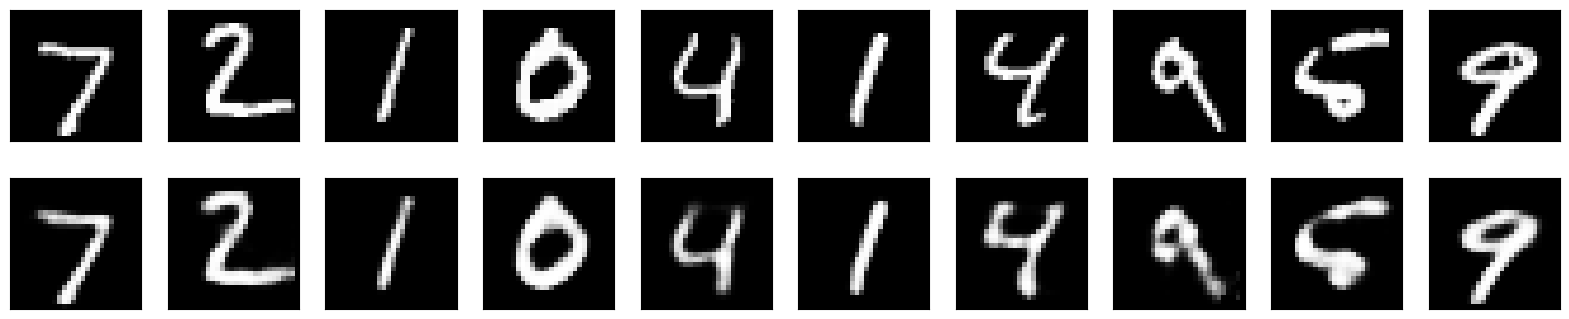

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Завантаження та підготовка даних
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація значень пікселів у діапазоні [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Створення архітектури автоенкодера
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Створення моделі автоенкодера
autoencoder = Model(input_img, decoded)

# Компіляція моделі
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Навчання автоенкодера
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Оцінка якості реконструкції на тестовому наборі даних
decoded_imgs = autoencoder.predict(x_test)

# Візуалізація оригінальних та відтворених зображень
import matplotlib.pyplot as plt

n = 10  # Кількість зображень для відображення
plt.figure(figsize=(20, 4))
for i in range(n):
    # Візуалізація оригінальних зображень
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Візуалізація відтворених зображень
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
